# MACHINE LEARNING CLUSTERING

## This script contains:
1. Importing libraries, data and renaming columns
2. The elbow technique
3. K-means clustering
4. Evaluation

### 1. Importing libraries, data and renaming columns

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# define path
path = r'C:\Users\Administrator\Documents\data analytics\Advanced Analytics and Dashbord Design\Exercise 6.5'

In [6]:
# read the real estate file (re)
re = pd.read_csv(os.path.join(path, 'real_estate.csv'))

In [7]:
re.columns # list columns in the dataframe re

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [8]:
re.shape # check the nr of columns and rows in the file

(414, 8)

In [9]:
re.head(5) # check header data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
# Rename the columns in the same way as in Exercise 6.2.

re.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops', 'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' }, inplace = True)

In [12]:
re.head(5) # Check renamed columns

,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### 2. THE ELBOW TECHNIQUE - Determine in how many clusters to group the data. At what point will no more clusters help explaining the data?

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [23]:
score = [kmeans[i].fit(re).score(re) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.
score

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

[-663923028.4639182,
 -187053609.80588207,
 -61014500.644654214,
 -43044225.15635157,
 -36170659.542567946,
 -21667989.460616253,
 -17810158.68581339,
 -14427902.189804466,
 -13474914.324070169]

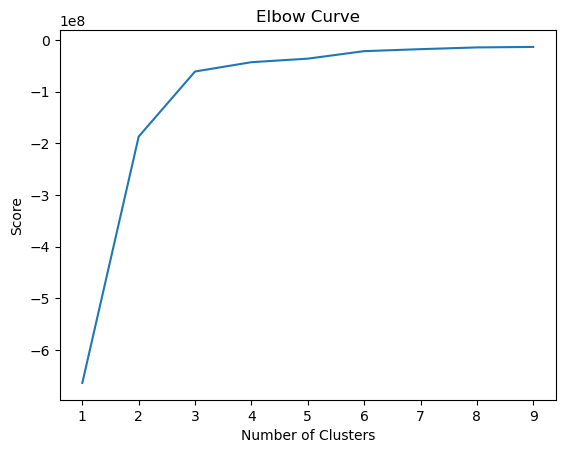

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [25]:
# There is a large jump between 2 and 3 on the x-axis. This means that the optimal nr of clusters is 3, where the curve starts to flatten out.

### 3. K-MEANS CLUSTERING

In [27]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [30]:
# Fit the k-means object to the data.

kmeans.fit(re)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

In [31]:
re['clusters'] = kmeans.fit_predict(re) # What cluster should the data be assigned to?

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [32]:
re.head(5)

,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit,clusters
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,1
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,1
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,1
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,1
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,1


In [33]:
re['clusters'].value_counts() # Are all clusters represented in the data? Count how many assigments to each cluster.

clusters
1    280
0     96
2     38
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

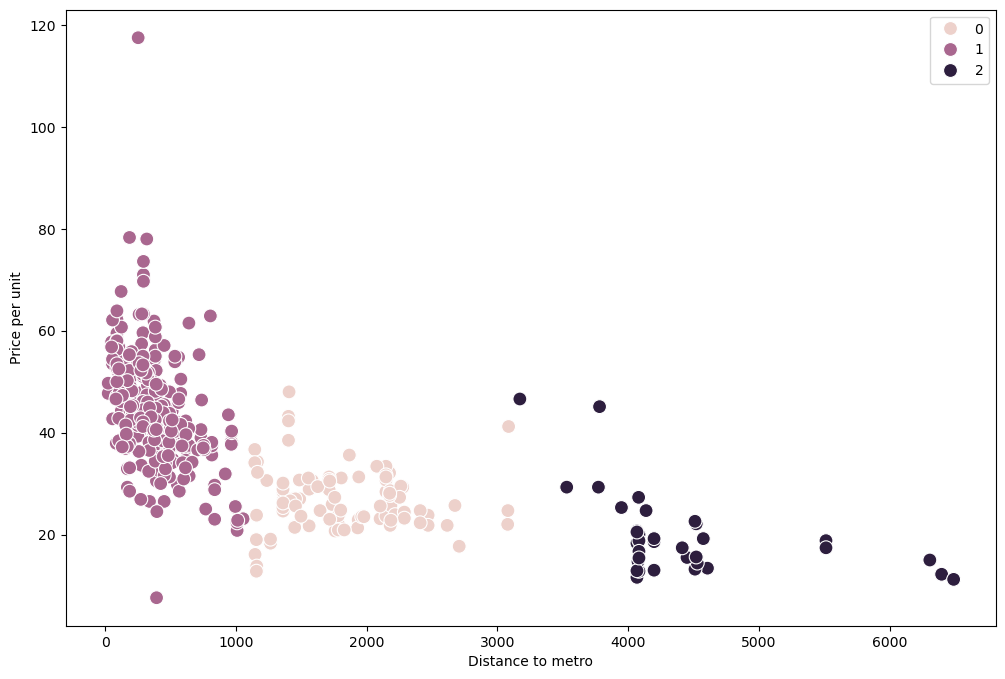

In [35]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=re['D. metro'], y=re['Price per unit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance to metro') # Label x-axis.
plt.ylabel('Price per unit') # Label y-axis.
plt.show()

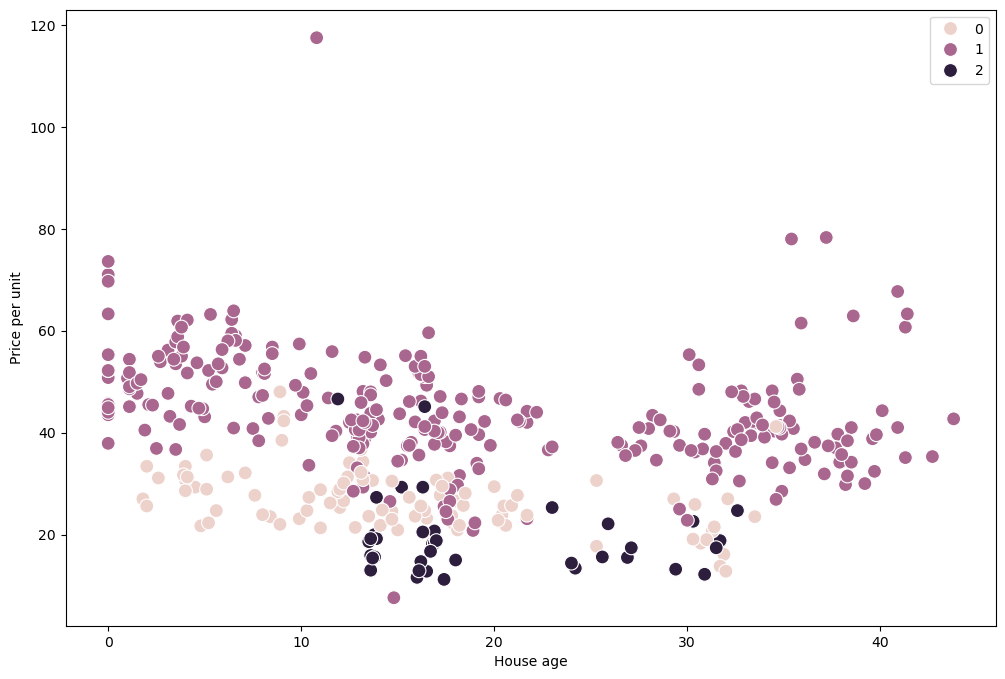

In [36]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=re['House age'], y=re['Price per unit'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('House age') 
plt.ylabel('Price per unit') 
plt.show()

In [37]:
re.loc[re['clusters'] == 2, 'cluster'] = 'dark purple' # Assign a color column to the clusters
re.loc[re['clusters'] == 1, 'cluster'] = 'purple'
re.loc[re['clusters'] == 0, 'cluster'] = 'pink'

In [39]:
re.groupby('cluster').agg({'N. shops':['mean', 'median'], 
                         'House age':['mean', 'median'], 
                         'D. metro':['mean', 'median'],
                          'Price per unit':['mean', 'median']}) # Group into the color cluster and calculate mean and median for each of the variables.

N. shops         House age            D. metro             \
                 mean median       mean median         mean     median   
cluster                                                                  
dark purple  0.236842    0.0  19.660526  16.75  4392.139553  4082.0150   
pink         2.031250    2.0  15.313542  14.15  1808.985656  1757.4085   
purple       5.325000    5.0  18.270714  16.20   386.302676   373.6163   

            Price per unit         
                      mean median  
cluster                            
dark purple      19.434211  17.80  
pink             26.787500  26.35  
purple           44.334643  42.50

### 4. EVALUATION
- The purple has the shortest distance to the metro according to this analysis. It also has most shops. --> Highest price per unit for property.
- The dark purple cluster has the longest distance to the metro and fewest shops. --> Lowest price per unit for property.
- The pink is in the middle. It has a median of 2 shops and 1757 m distance to the metro. --> Price for property in the middle!
- The house age does not have a significant impact on the price according to this analysis.